In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import bilby
import pandas as pd
import numpy as np
import corner

In [2]:
rng = np.random.default_rng(12345)

# sns.set_theme(palette='colorblind', font_scale=1.5)

# 8078 4423 4114 14858 28107
nsamples = 4114

# TaylorF2Ecck (3PN)
result1 = bilby.result.read_in_result("/Users/phurailatpamhemantakumar/phd/mypackages/TaylorF2Ecck/Event Analysis/GW200105/result_files/TF2Ecck_3PN_CIT_final.hdf5")
chirp_mass1 = result1.posterior['chirp_mass'].values
mass_ratio1 = result1.posterior['mass_ratio'].values
eccentricity1 = result1.posterior['eccentricity'].values
data1 = pd.DataFrame({'chirp_mass': chirp_mass1, 'mass_ratio': mass_ratio1, 'eccentricity': eccentricity1})

# TaylorF2Ecc (3PN)
result2 = bilby.result.read_in_result("/Users/phurailatpamhemantakumar/phd/mypackages/TaylorF2Ecck/Event Analysis/GW200105/result_files/TF2Ecc_3PN_CIT_final.hdf5")
chirp_mass2 = result2.posterior['chirp_mass'].values
mass_ratio2 = result2.posterior['mass_ratio'].values
eccentricity2 = result2.posterior['eccentricity'].values
data2 = pd.DataFrame({'chirp_mass': chirp_mass2, 'mass_ratio': mass_ratio2, 'eccentricity': eccentricity2})

# TaylorF2 (3PN)
result3 = bilby.result.read_in_result("/Users/phurailatpamhemantakumar/phd/mypackages/TaylorF2Ecck/Event Analysis/GW200105/result_files/TF2_3PN_CIT_final.hdf5")

# TaylorF2 (3.5PN)
result4 = bilby.result.read_in_result("/Users/phurailatpamhemantakumar/phd/mypackages/TaylorF2Ecck/Event Analysis/GW200105/result_files/TF2_3p5PN_CIT_final.hdf5")

In [5]:
# log10 bayes factor
result1.log_10_bayes_factor, result2.log_10_bayes_factor, result3.log_10_bayes_factor, result4.log_10_bayes_factor

(26.56721368438569, 26.659318348098154, 26.1994365674507, 26.2391102338155)

In [6]:
# diffence in log10 bayes factor wrt TF2Ecck
abs(26.659318348098154-26.56721368438569), abs(26.659318348098154-26.56958292594265), abs(26.659318348098154-26.56958292594265), abs(26.659318348098154-26.56721368438569)

(0.0921046637124654,
 0.08973542215550268,
 0.08973542215550268,
 0.0921046637124654)

In [4]:
# 90% confidence intervals for eccentricity
ecc1_low = np.percentile(data1['eccentricity'], 5)
ecc1_med = np.percentile(data1['eccentricity'], 50)
ecc1_high = np.percentile(data1['eccentricity'], 95)
ecc2_low = np.percentile(data2['eccentricity'], 5)
ecc2_med = np.percentile(data2['eccentricity'], 50)
ecc2_high = np.percentile(data2['eccentricity'], 95)

print(rf"e01 = {ecc1_med:.3f}^{{+{ecc1_high - ecc1_med:.3f}}}_{{-{ecc1_med - ecc1_low:.3f}}}")
print(rf"e02 = {ecc2_med:.3f}^{{+{ecc2_high - ecc2_med:.3f}}}_{{-{ecc2_med - ecc2_low:.3f}}}")

e01 = 0.122^{+0.027}_{-0.098}
e02 = 0.122^{+0.028}_{-0.096}


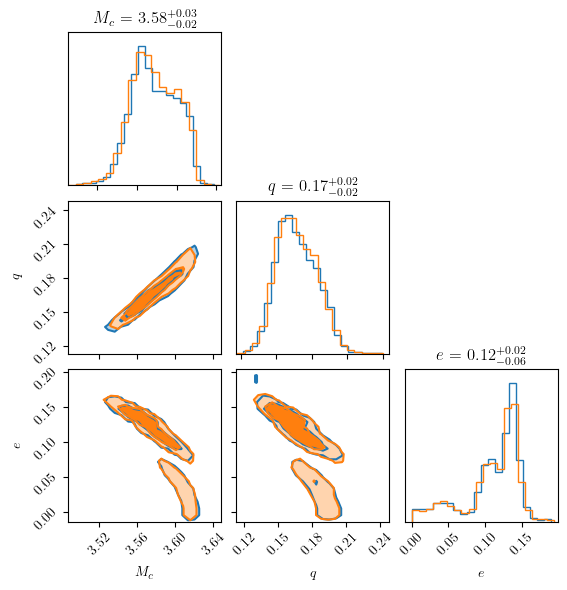

In [6]:
# plot corner
ndim = 3
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
fig, axes = plt.subplots(ndim, ndim, figsize=(6, 6), gridspec_kw={"hspace": 0.1, "wspace": 0.1})

corner.corner(
    data1,
    labels=["$M_c$", "$q$", "$e$"],
    levels=[0.68, 0.95],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    plot_datapoints=False,
    fill_contours=True,
    plot_density=False,
    color='C0',
    fig=fig,
)
corner.corner(
    data2,
    labels=["$M_c$", "$q$", "$e$"],
    levels=[0.68, 0.95],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    plot_datapoints=False,
    fill_contours=True,
    plot_density=False,
    color='C1',
    fig=fig,
)
plt.show()